# 1.BlackFriday shopping data
 The bargraphs describe purchase amount in dollars with two factors including Marital status and Age.

Text(0.5,0,'Age')

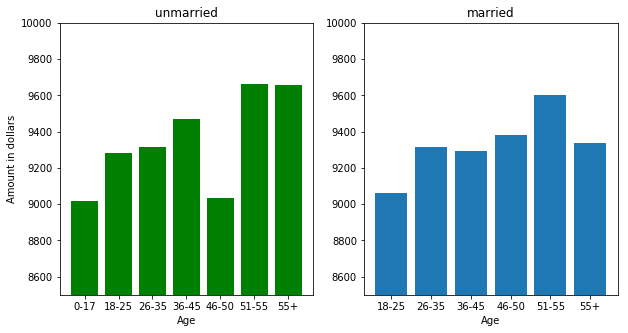

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('BlackFriday.csv')

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(df[df.Marital_Status==0]['Purchase'].groupby(df.Age).mean().index,df[df.Marital_Status==0]['Purchase'].groupby(df.Age).mean(),color='Green')
plt.ylim(8500,10000)
plt.title('unmarried')
plt.ylabel('Amount in dollars')
plt.xlabel('Age')

plt.subplot(1,2,2)
plt.bar(df[df.Marital_Status==1]['Purchase'].groupby(df.Age).mean().index,df[df.Marital_Status==1]['Purchase'].groupby(df.Age).mean())
plt.ylim(8500,10000)
plt.title('married')
plt.xlabel('Age')

# 2.Avocado data
The bargraph and line graph shows annual average price change of avocados in the US

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


(1, 1.5908839566585116)

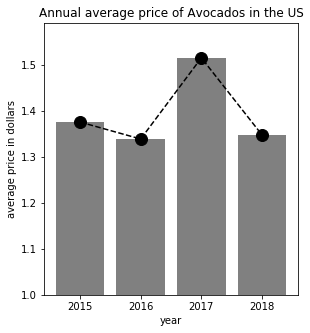

In [81]:
df=pd.read_csv('avocado.csv')
print(df.columns)
print(df['Total Volume'].groupby(df.year))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.bar(df['AveragePrice'].groupby(df.year).mean().index,df['AveragePrice'].groupby(df.year).mean(),color='gray')
plt.plot(df['AveragePrice'].groupby(df.year).mean().index,df['AveragePrice'].groupby(df.year).mean(),color='black',marker='o',markersize=12,linestyle='dashed')
plt.title('Annual average price of Avocados in the US')
plt.ylabel('average price in dollars')
plt.xlabel('year')
plt.ylim(1)

# 3.google play store data
The graph shows averaged ratings for apps in google play store according to numbers of install 

Installs
1+                5.000000
1,000+            4.066760
1,000,000+        4.220862
1,000,000,000+    4.258621
10+               4.624638
10,000+           4.039703
10,000,000+       4.313419
100+              4.363430
100,000+          4.110261
100,000,000+      4.411491
5+                4.611111
5,000+            4.024537
5,000,000+        4.243218
50+               4.419643
50,000+           4.051178
50,000,000+       4.351211
500+              4.176617
500,000+          4.168216
500,000,000+      4.350000
Name: Rating, dtype: float64


(0, 5.5)

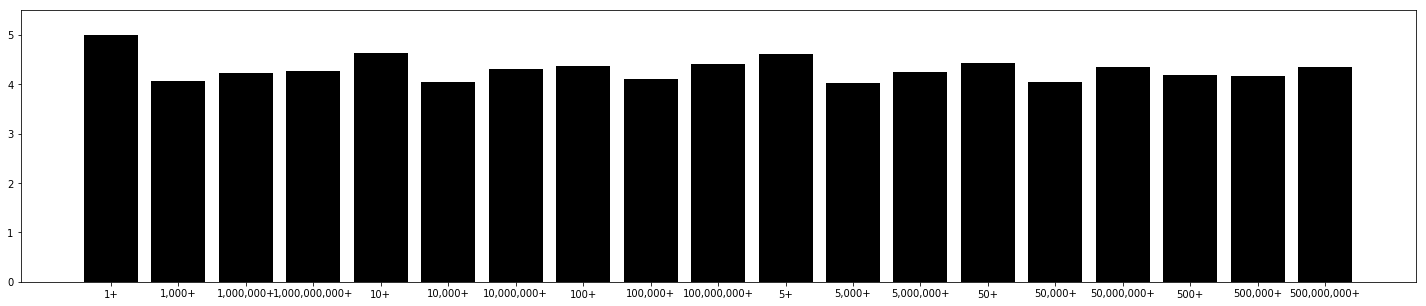

In [117]:
df=pd.read_csv('googleplaystore.csv')

result=df['Rating'].groupby(df.Installs).mean().sort_index()
result=result.drop(['Free','0','0+'])
print(result)

plt.figure(figsize=(25,5))
plt.bar(result.index,result, color='black')
plt.ylim(0,5.5)

# 4.Police killing in the US data
The scatterplot revealed the interaction between numbers of killings by police and poverty rate for each state. The results suggest there is not significant correlation between these two variables. However, if outliers are excluded, the significant pattern could be revealed. 

Text(0,0.5,'police killings')

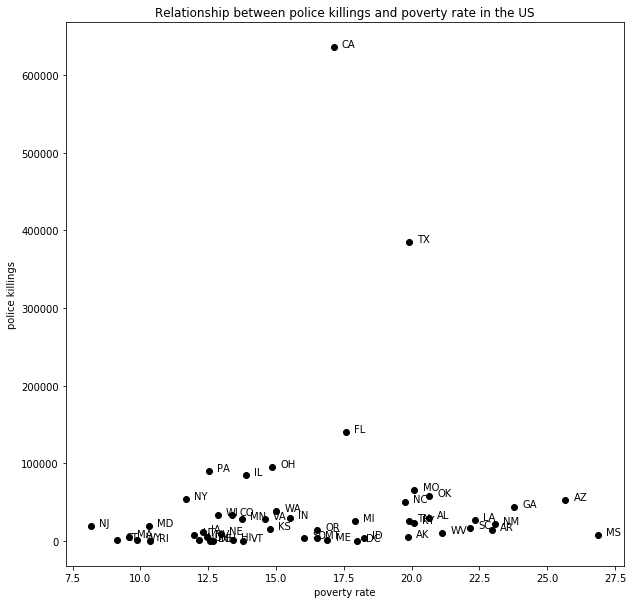

In [33]:
df1=pd.read_csv('PercentagePeopleBelowPovertyLevel.csv',encoding = "ISO-8859-1")
df2=pd.read_csv('PoliceKillingsUS.csv',encoding = "ISO-8859-1")

df1=df1.rename(columns={"Geographic Area":"state"})
df=df1.merge(df2)
df['poverty_rate']=pd.to_numeric(df['poverty_rate'], errors='coerce')
poverty=df['poverty_rate'].groupby(df.state).mean()
outbreak=df['poverty_rate'].groupby(df.state).count()


plt.figure(figsize=(10,10))
plt.scatter(poverty, outbreak, color='black')

for i, txt in enumerate(poverty.index):
    plt.annotate(txt, (poverty[i], outbreak[i]),xytext=(poverty[i]+0.3, outbreak[i]-2))
    
plt.title('Relationship between police killings and poverty rate in the US')
plt.xlabel('poverty rate')
plt.ylabel('police killings')